## XAMS SiPM simulation## 

In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define general geometry parameters ###

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
# make an instant of the geometry class
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm)

### Define the geometry of the silicon PMs ###

Add the SiPMs to the geometry

In [3]:
inch = 25.4 # mm
    
sipm = SiPM(type="plane",position=[  0.0,-15.0,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[-13.0, -7.5,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[+13.0, -7.5,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[ -4.0,  0.0,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[ +4.0,  0.0,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[-13.0, +7.5,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[+13.0, +7.5,z_plane],qeff=1)
geo.add_sipm(sipm)

### Simulate the SiPM acceptance ###

* uv_position is the position where the UV photons are generated
* n_mc is the number of MC photons

In [4]:
#sim = Simulator(geo=geo,uv_position=[30.4,37.6,0],n_mc=100000)
x0 = [ 12,-12, 0.]
sim = Simulator(geo=geo,uv_position=x0,n_mc=100000)

sim.generate_events()

generated  0  events
Number of SiPMs =  7  Generated hits from x= [ 12. -12.   0.]
 0  (x,y,z) = ( 0.0, -15.0, 10.0) p(hit) = 0.00197  qe = 1.000
 1  (x,y,z) = (-13.0, -7.5, 10.0) p(hit) = 0.00041  qe = 1.000
 2  (x,y,z) = (13.0, -7.5, 10.0) p(hit) = 0.00556  qe = 1.000
 3  (x,y,z) = (-4.0,  0.0, 10.0) p(hit) = 0.00073  qe = 1.000
 4  (x,y,z) = ( 4.0,  0.0, 10.0) p(hit) = 0.00150  qe = 1.000
 5  (x,y,z) = (-13.0,  7.5, 10.0) p(hit) = 0.00031  qe = 1.000
 6  (x,y,z) = (13.0,  7.5, 10.0) p(hit) = 0.00065  qe = 1.000
event generation done


### Emulate events and reconstruct the position ###

* n_event = number of events to emulate
* n_uv = number of UV photons assumed for the S2 signal

In [5]:
%load_ext snakeviz

In [11]:
%%time
rec = Reconstruction(sim=sim, alpha0=0.0)
df = rec.emulate_events(n_uv=120000,n_event=1000,n_min=0,method="LINEAR",plot=True,nbins=100,range=((-20.,20.),(-20.,20.)))

Wall time: 1min 8s


# Plots from here ...... ###

1D distribution of reconstructed x and y position

N entry: 21
<xr> =  14.04314632133343  +/- 1.261925932782216  mm
    rms_x =  5.782871108402261  mm
<yr> =  -11.27448781323655  +/- 0.8549159899348058  mm
    rms_y =  3.9177172367043522  mm


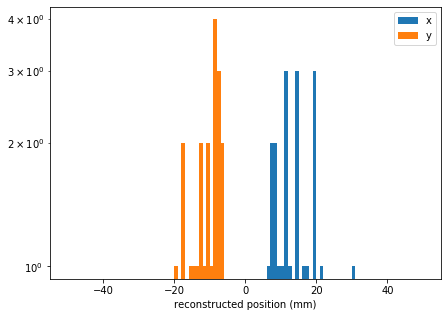

In [7]:
a = rec.plot(type="res",bins=100,range=(-50,50))
plt.yscale('log')

2D distribution of y as a function of x

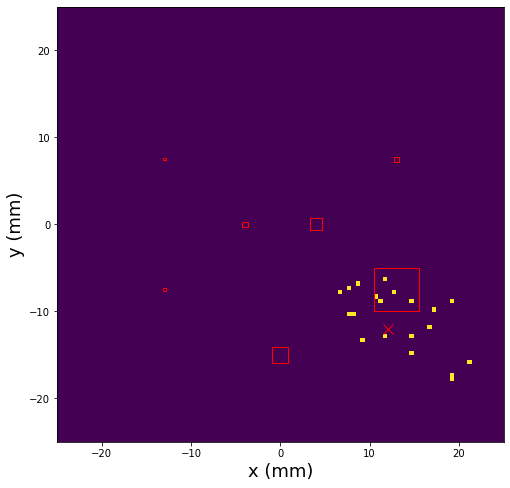

In [8]:
inch = 25.4
ax = rec.plot(type="xy",range=((-25,25),(-25,25)))
#ax = rec.plot(type="xy",range=((-10,10),(40,60)))
plt.plot([x0[0]],[x0[1]],marker='x',color='red',markersize=10)

Distribution of reconstructed UV intensity

 N(UV) reco =  9.059886887382804e+30  +/- 6.815527489215736e+30


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  


(0.1, 1000.0)

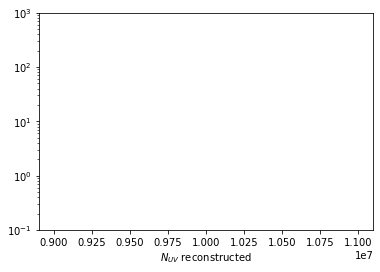

In [9]:
rec.plot(type="intensity",range=(9000000,11000000))
plt.yscale('log')
plt.ylim([0.1,1e3])

In [10]:
rec.plot(type="r0")

TypeError: 'NoneType' object is not callable

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(figsize=(16,6))

gs = GridSpec(2, 2, figure=fig)
ax1 = plt.subplot(gs.new_subplotspec((0, 0), rowspan=2))
ax2 = plt.subplot(gs.new_subplotspec((0, 1), rowspan=1))
ax3 = plt.subplot(gs.new_subplotspec((1, 1), rowspan=1))


plt.show()